# Evaluating Regression Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
import statsmodels.api as sm

# Ignores pink warning boxes
import warnings
warnings.filterwarnings('ignore')
import math
import wrangle

1. Load your zillow dataset.

In [2]:
train, validate, test = wrangle.wrangle_zillow()

In [3]:
train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
2086451,3,2.5,1746,329842,1979,3281.70,6059
1608617,2,2.0,1503,378681,1980,3779.86,6059
854792,4,4.0,2469,3464540,1950,41401.23,6037
2066831,2,1.0,1507,78173,1952,1477.34,6037
2508263,2,2.0,1150,54832,1966,1139.31,6037
...,...,...,...,...,...,...,...
2578047,1,1.0,678,294384,1990,3804.80,6059
972773,4,2.0,1392,173600,1955,2840.54,6037
2204227,3,2.0,1370,339532,1977,3854.74,6059
994295,2,3.0,1204,305000,1979,3747.38,6037


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

Here is some sample code to get you started:

`from sklearn.linear_model import LinearRegression`

assuming X and y are already defined
`model = LinearRegression().fit(X, y)
predictions = model.predict(X)
Modify and add to the code above as necessary for it to work with the zillow dataset.`

In [4]:
train.drop(columns = ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'taxamount', 'fips'], inplace=True)

In [5]:
X_train = train[['calculatedfinishedsquarefeet']]
y_train = train['taxvaluedollarcnt']
                
X_validate = validate[['calculatedfinishedsquarefeet']]
y_validate = validate['taxvaluedollarcnt']

X_test = test[['calculatedfinishedsquarefeet']]
y_test = test['taxvaluedollarcnt']

In [6]:
X_train

,calculatedfinishedsquarefeet
2086451,1746
1608617,1503
854792,2469
2066831,1507
2508263,1150
...,...
2578047,678
972773,1392
2204227,1370
994295,1204


In [7]:
y_train

2086451     329842
1608617     378681
854792     3464540
2066831      78173
2508263      54832
            ...   
2578047     294384
972773      173600
2204227     339532
994295      305000
2977560     394451
Name: taxvaluedollarcnt, Length: 1632328, dtype: int64

In [8]:
baseline = train.taxvaluedollarcnt.mean()
baseline

444573.81453604915

In [9]:
train['baseline'] = train.taxvaluedollarcnt.mean()
train.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline
2086451,1746,329842,444573.814536
1608617,1503,378681,444573.814536
854792,2469,3464540,444573.814536
2066831,1507,78173,444573.814536
2508263,1150,54832,444573.814536


Text(0.5, 1.0, 'Baseline model')

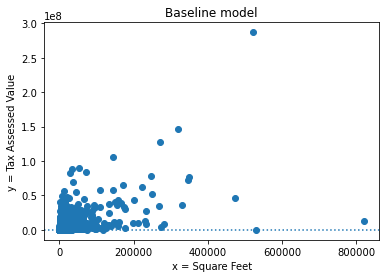

In [10]:
plt.scatter(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
plt.axhline(train.taxvaluedollarcnt.mean(), ls = ':')
plt.xlabel('x = Square Feet')
plt.ylabel('y = Tax Assessed Value')
plt.title('Baseline model')

In [11]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_train)

In [12]:
train['yhat'] = predictions

In [13]:
train.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat
2086451,1746,329842,444573.814536,425058.182176
1608617,1503,378681,444573.814536,372169.761399
854792,2469,3464540,444573.814536,582417.557576
2066831,1507,78173,444573.814536,373040.352687
2508263,1150,54832,444573.814536,295340.080187


Text(0.5, 1.0, 'OLS linear model')

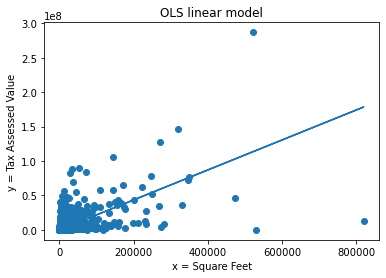

In [14]:
plt.scatter(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
plt.plot(train.calculatedfinishedsquarefeet, train.yhat)
plt.xlabel('x = Square Feet')
plt.ylabel('y = Tax Assessed Value')
plt.title('OLS linear model')

3. Plot the residuals for the linear regression model that you made.

In [15]:
# calculates the residual for my model and for my baseline by subtracting the 
# predicted value from the actual value
train['residual'] = train.taxvaluedollarcnt - train.yhat
train['baseline_residual'] = train.taxvaluedollarcnt - train.baseline

Text(0.5, 1.0, 'OLS model residuals')

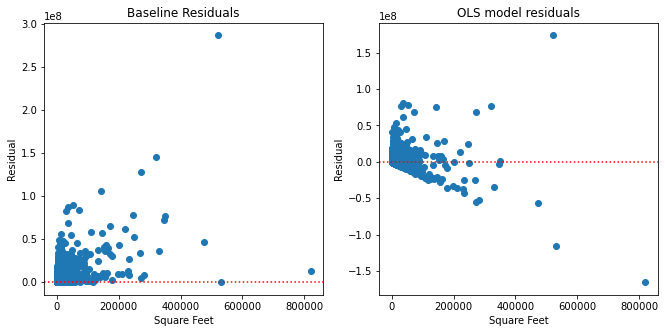

In [16]:
plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(train.calculatedfinishedsquarefeet, train.baseline_residual)
plt.axhline(y = 0, ls = ':', color='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.calculatedfinishedsquarefeet, train.residual)
plt.axhline(y = 0, ls = ':', color ='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals')

In [17]:
baseline_residual_min = train.baseline_residual.min()
baseline_residual_max = train.baseline_residual.max()
residual_min = train.residual.min()
residual_max = train.residual.max()

Negative Residual = Prediction too high
Positive Residual = Prediction too low


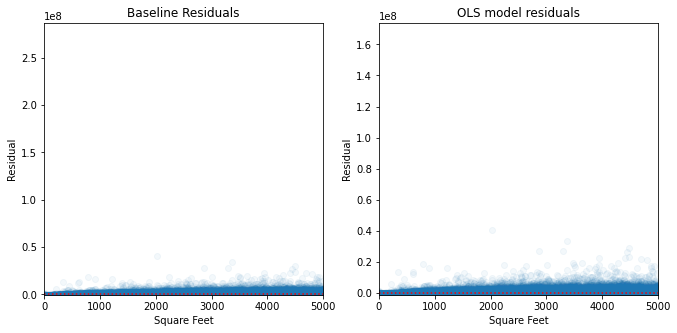

In [18]:
plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(train.calculatedfinishedsquarefeet, train.baseline_residual, alpha=.05)
plt.axhline(y = 0, ls = ':', color = 'red')
plt.xlim(0,5000)
plt.ylim(baseline_residual_min, baseline_residual_max)
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.calculatedfinishedsquarefeet, train.residual, alpha=0.05)
plt.axhline(y = 0, ls = ':', color ='red')
plt.xlim(0,5000)
plt.ylim(-1_000_000, residual_max)
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals')
print("Negative Residual = Prediction too high")
print("Positive Residual = Prediction too low")

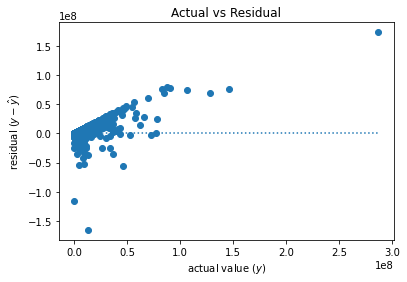

In [19]:
# Residual plot (y vs residual)
actual = train.taxvaluedollarcnt
predicted = train.yhat
residuals = actual - predicted
plt.hlines(0, actual.min(), actual.max(), ls=':')
plt.scatter(actual, residuals)
plt.ylabel('residual ($y - \hat{y}$)')
plt.xlabel('actual value ($y$)')
plt.title('Actual vs Residual')
plt.show()

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [20]:
train['residual^2'] = train.residual**2
train['baseline_residual^2'] = train.baseline_residual**2

train.head(1)

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
2086451,1746,329842,444573.814536,425058.182176,-95216.182176,-114731.814536,9.066121e+09,1.316339e+10


Calculating SSE

In [21]:
SSE = train['residual^2'].sum()
SSE_baseline = train['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 592941757755888768.0
SSE Baseline = 849829063762983680.0


In [22]:
SSE < SSE_baseline

True

Calculating MSE

In [23]:
len(train)
train.shape[0]

1632328

In [24]:
MSE = SSE/len(train)
MSE_baseline = SSE_baseline/len(train)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE =  363249149531.2
MSE baseline =  520623957784.8


Calculating RMSE

In [25]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  602701.5
RMSE baseline =  721542.8


6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [26]:
if SSE < SSE_baseline:
    print('OLS Regression Model Performs Better than Baseline')
else:
    print('OLS Regression Model Performs Worse than Baseline')

OLS Regression Model Performs Better than Baseline


7. What is the amount of variance explained in your model?

In [29]:
# calculates the R2 score

from sklearn.metrics import r2_score
r2_score(train.taxvaluedollarcnt, train.yhat)

0.30228114918736226

8. Is your model better than the baseline model?

In [30]:
X2 = sm.add_constant(train.calculatedfinishedsquarefeet)
est = sm.OLS(train.taxvaluedollarcnt, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      taxvaluedollarcnt   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                 7.072e+05
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:21:22   Log-Likelihood:            -2.4041e+07
No. Observations:             1632328   AIC:                         4.808e+07
Df Residuals:                 1632326   BIC:                         4.808e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

9. Create a file named `evaluate.py` that contains the following functions.

`plot_residuals(y, yhat)`: creates a residual plot
`regression_errors(y, yhat)`: returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
`baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model
`better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false

In [ ]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()

In [31]:
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)

Bonus Exercises

1. Load the `tips` dataset from either `pydataset` or `seaborn`. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

2. Load the `mpg` dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your `evaluate.py` to help accomplish this.